HW2. Task 3. Алина Щукина

In [1]:
import numpy as np
from scipy.stats import t
from matplotlib import pyplot

In [2]:
def my_t_test(x_n: list, mu0, alpha = 0.05):
    
    # H0: mu = mu0 (correct)
    # H1: mu != mu0 (two-sided)
    
    n = len(x_n)
    
    sample_mean = np.mean(x_n)
    
    estimated_sigma = (sum([(x_i - sample_mean) ** 2 for x_i in x_n]) / (n - 1)) ** 0.5
    
    # SEM = standard error of the mean
    estimated_sem = estimated_sigma / n ** 0.5
    
    # calculating t-statistic using estimated SEM instead of true SEM
    t_statistic = (sample_mean - mu0) / estimated_sem
    
    # if H0 is true, t has distribution of Student(n - 1)
    if t_statistic > 0:
        p_value = 2*(1 - t(df = n - 1).cdf(t_statistic))
    else:
        p_value = 2*(t(df = n - 1).cdf(t_statistic))
    
    if p_value <= alpha:
        return 1
    else:
        return 0

a)

In [5]:
from scipy.stats import norm

n = 100
alpha = 0.05
true_mu = 0
true_sigma = 1
true_xi_dist = norm.freeze(loc=true_mu, scale=true_sigma)

# H0: mu = mu0 (correct)
# H1: mu != mu0 (two-sided)
mu0 = 0

fpr = 0

np.random.seed(101)

for _ in range(10000):
    sample = true_xi_dist.rvs(size=n)
    fpr += my_t_test(sample, mu0, alpha)

print(f'False Positive Rate: {fpr/10000}') 

False Positive Rate: 0.0478


b)

In [7]:
from scipy.stats import norm


def experimentI(n, alpha, sigma):

    true_mu = 0
    true_sigma = sigma
    true_aplha = alpha
    n = n
    mu0 = 0

    true_xi_dist = norm.freeze(loc=true_mu, scale=true_sigma)

    # H0: mu = mu0 (correct)
    # H1: mu != mu0 (two-sided)
    
    fpr = 0

    np.random.seed(101)

    for _ in range(10000):
        sample = true_xi_dist.rvs(size=n)
        fpr += my_t_test(sample, mu0, alpha)

            
    return fpr/10000

final = []

ns = [2, 5, 10, 20, 50, 100]
alphas = [0.01, 0.05, 0.1]
sigmas = [1, 2, 3]
for sigma in sigmas:
    sigma_fprs = []
    for alpha in alphas:
        alpha_fprs = []
        for n in ns:
            alpha_fprs.append(experimentI(n, alpha, sigma))
        sigma_fprs.append(alpha_fprs)
    final.append(sigma_fprs)

In [54]:
final

[[[0.0108, 0.0103, 0.0102, 0.0098, 0.0103, 0.0104],
  [0.0481, 0.0518, 0.0486, 0.0474, 0.0507, 0.0478],
  [0.0964, 0.1003, 0.1009, 0.0967, 0.1009, 0.1008]],
 [[0.0108, 0.0103, 0.0102, 0.0098, 0.0103, 0.0104],
  [0.0481, 0.0518, 0.0486, 0.0474, 0.0507, 0.0478],
  [0.0964, 0.1003, 0.1009, 0.0967, 0.1009, 0.1008]],
 [[0.0108, 0.0103, 0.0102, 0.0098, 0.0103, 0.0104],
  [0.0481, 0.0518, 0.0486, 0.0474, 0.0507, 0.0478],
  [0.0964, 0.1003, 0.1009, 0.0967, 0.1009, 0.1008]]]

Заметим, что для любой сигмы в рамках симуляции Монте-Карло мы получаем одинаковые значения False Positive Rate при соответствующих alpha и n. Это происходит потому, что масштабирование сигмы хоть и влияет на выборку, но потом нивелируется в процессе расчёта t-статистики, когда мы вычитаем среднее и делим на оценённое нами отклонение.

Поэтому построим один график. И заметим, что для каждого значения alpha при всех n мы получаем почти что 0.01, 0.05 и 0.1 соответственно, то есть во всех этих случаях альфа получается одинаковая и равная той, что мы подаём алгоритму на вход. 

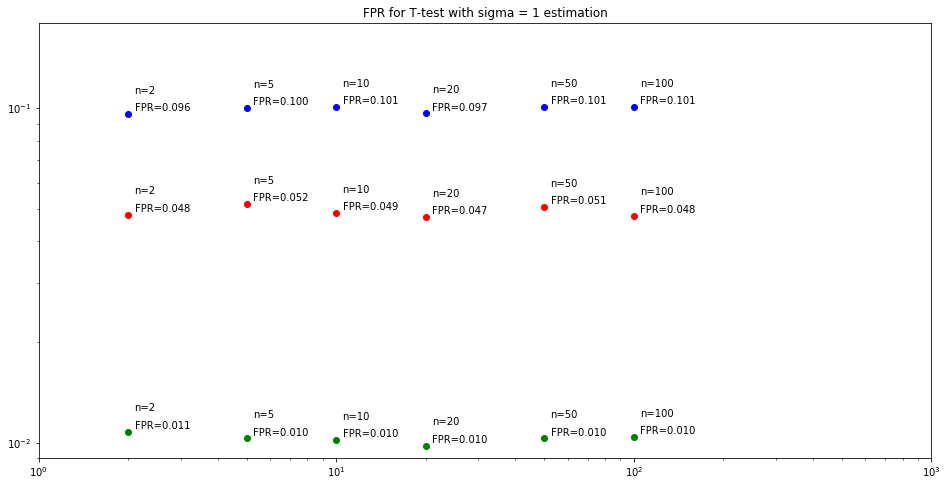

In [53]:
pyplot.figure(figsize=(16, 8))
fprs0 = final[0][0]
fprs1 = final[0][1]
fprs2 = final[0][2]
pyplot.plot(ns, fprs0, 'bo', linewidth=1.0, color='green')
pyplot.plot(ns, fprs1, 'bo', linewidth=1.0, color='red')
pyplot.plot(ns, fprs2, 'bo', linewidth=1.0)
pyplot.yscale('log')
pyplot.xscale('log')

for i in range(len(ns)):
    pyplot.annotate(f'n={ns[i]}', (ns[i] * 1.05, fprs0[i] * 1.15))
    pyplot.annotate(f'FPR={fprs0[i]:.3f}', (ns[i] * 1.05, fprs0[i] * 1.02))
    pyplot.annotate(f'n={ns[i]}', (ns[i] * 1.05, fprs1[i] * 1.15))
    pyplot.annotate(f'FPR={fprs1[i]:.3f}', (ns[i] * 1.05, fprs1[i] * 1.02))
    pyplot.annotate(f'n={ns[i]}', (ns[i] * 1.05, fprs2[i] * 1.15))
    pyplot.annotate(f'FPR={fprs2[i]:.3f}', (ns[i] * 1.05, fprs2[i] * 1.02))
    
pyplot.xlim(left=1, right=1000)
pyplot.ylim(bottom=0.009, top=0.18)
pyplot.title('FPR for T-test with sigma = 1 estimation')
pyplot.show()


c) 

In [57]:
from scipy.stats import norm

n = 100
alpha = 0.05
true_mu = 0.1
true_sigma = 1
true_xi_dist = norm.freeze(loc=true_mu, scale=true_sigma)

# H0: mu = mu0 (not correct)
# H1: mu != mu0 (two-sided)
mu0 = 0

tpr = 0

np.random.seed(101)

for _ in range(10000):
    sample = true_xi_dist.rvs(size=n)
    tpr += my_t_test(sample, mu0, alpha)

print(f'False Negative Rate: {1 - tpr/10000}') 

False Negative Rate: 0.8338


d)

In [59]:
from scipy.stats import norm


def experimentII(n, mu, alpha, sigma):

    true_mu = mu
    true_sigma = sigma
    true_aplha = alpha
    n = n
    mu0 = 0

    true_xi_dist = norm.freeze(loc=true_mu, scale=true_sigma)

    # H0: mu = mu0 (not correct)
    # H1: mu != mu0 (two-sided)
    
    tpr = 0

    np.random.seed(101)

    for _ in range(10000):
        sample = true_xi_dist.rvs(size=n)
        tpr += my_t_test(sample, mu0, alpha)

            
    return 1 - tpr/10000

final = []

mus = [0.1, 0.5, 1, 5]
ns = [2, 5, 10, 20, 50, 100]
alphas = [0.01, 0.05, 0.1]
sigmas = [1, 2, 3]
for mu in mus:
    mu_tprs = []
    for sigma in sigmas:
        sigma_tprs = []
        for alpha in alphas:
            alpha_tprs = []
            for n in ns:
                alpha_tprs.append(experimentII(n, mu, alpha, sigma))
            sigma_tprs.append(alpha_tprs)
        mu_tprs.append(sigma_tprs)
    final.append(mu_tprs)


Заметим, что при увеличении n при фиксированных остальных параметрах False Negative Rate уменьшается, поскольку с увеличением выборки уменьшается стандартная ошибка. Также, заметим, что для разных alpha это уменьшение происходит с разной скоростью: для alpha = 0.1 уменьшение происходит быстрее всего, затем для alpha = 0.05 и потом для alpha = 0.01. Это происходит потому, что устанавливая меньшую alpha, нам приходится жертвовать мощностью критерия. Поэтому там, где alpha = 0.01, мощность растёт медленнее всего даже при увеличении n. 

Также, заметим, что с ростом mu False Negative Rate уменьшается сильнее при фиксированных  n, сигма и aplha, поскольку mu0 = 0 всё сильнее отдаляется от истинного mu. Интересно, что уже при mu = 1 FNR достигает нуля при сигме 1 и n = 50 и 100. 

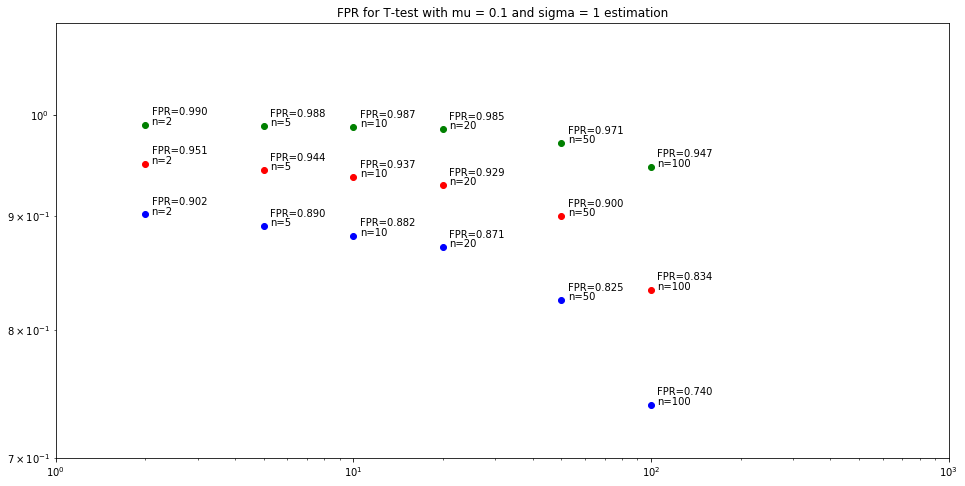

In [73]:
pyplot.figure(figsize=(16, 8))
fprs0 = final[0][0][0]
fprs1 = final[0][0][1]
fprs2 = final[0][0][2]
pyplot.plot(ns, fprs0, 'bo', linewidth=1.0, color='green')
pyplot.plot(ns, fprs1, 'bo', linewidth=1.0, color='red')
pyplot.plot(ns, fprs2, 'bo', linewidth=1.0)
pyplot.yscale('log')
pyplot.xscale('log')

for i in range(len(ns)):
    pyplot.annotate(f'n={ns[i]}', (ns[i] * 1.05, fprs0[i] * 1))
    pyplot.annotate(f'FPR={fprs0[i]:.3f}', (ns[i] * 1.05, fprs0[i] * 1.01))
    pyplot.annotate(f'n={ns[i]}', (ns[i] * 1.05, fprs1[i] * 1))
    pyplot.annotate(f'FPR={fprs1[i]:.3f}', (ns[i] * 1.05, fprs1[i] * 1.01))
    pyplot.annotate(f'n={ns[i]}', (ns[i] * 1.05, fprs2[i] * 1))
    pyplot.annotate(f'FPR={fprs2[i]:.3f}', (ns[i] * 1.05, fprs2[i] * 1.01))
    
pyplot.xlim(left=1, right=1000)
pyplot.ylim(bottom=0.7, top=1.1)
pyplot.title('FPR for T-test with mu = 0.1 and sigma = 1 estimation')
pyplot.show()


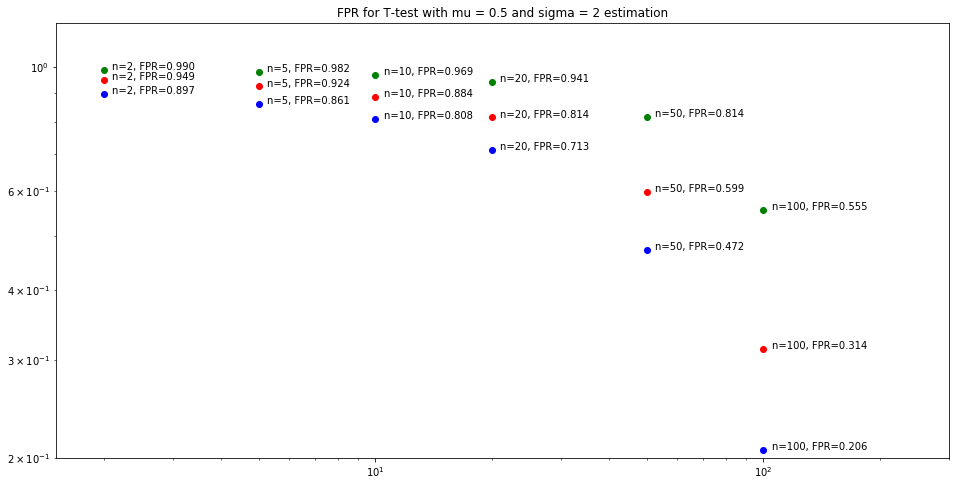

In [97]:
pyplot.figure(figsize=(16, 8))
fprs0 = final[1][1][0]
fprs1 = final[1][1][1]
fprs2 = final[1][1][2]
pyplot.plot(ns, fprs0, 'bo', linewidth=1.0, color='green')
pyplot.plot(ns, fprs1, 'bo', linewidth=1.0, color='red')
pyplot.plot(ns, fprs2, 'bo', linewidth=1.0)
pyplot.yscale('log')
pyplot.xscale('log')

for i in range(len(ns)):
    pyplot.annotate(f'n={ns[i]}, FPR={fprs0[i]:.3f}', (ns[i] * 1.05, fprs0[i] * 1))
    pyplot.annotate(f'n={ns[i]}, FPR={fprs1[i]:.3f}', (ns[i] * 1.05, fprs1[i] * 1))
    pyplot.annotate(f'n={ns[i]}, FPR={fprs2[i]:.3f}', (ns[i] * 1.05, fprs2[i] * 1))
    
pyplot.xlim(left=1.5, right=300)
pyplot.ylim(bottom=0.2, top=1.2)
pyplot.title('FPR for T-test with mu = 0.5 and sigma = 2 estimation')
pyplot.show()
